In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.misc import derivative
import scipy.integrate as integrate
import math
from numpy.linalg import solve

In [105]:
def right_func(x):
    return x**2

In [106]:
def k(x):
    return 1

In [107]:
def sol_func(x):
    return -x**4/12 + x/12

In [108]:
n = 10 #number of intervals.
# n+1 number of nodes
h = 1.0/n
x = np.linspace(0.,1.,n*10)

In [109]:
def basis_function(x,i):
    if (i == 0) or (i == n+1):
        return 0
    elif (x <= (i-1)*h ) or (x >= (i+1)*h):
        return 0
    elif (x <= i*h):
        return (x-(i-1)*h)*1.0/h
    else:
        return 1.0-(x-i*h)*1.0/h
def basis_derivative(x,i):
        if (i == 0) or (i == n+1):
            return 0
        elif (x <= (i-1)*h ) or (x >= (i+1)*h):
            return 0
        elif (x <= i*h):
            return 1.0/h
        else:
            return -1.0/h


In [134]:
A = np.zeros ((n-1 , n-1))
for i in range(n-1):
    for j in range(i+1):
        if abs(i-j) > 1:
            A[i,j] = 0
            A[j,i] = 0
        else:
            A[i,j] = 1.0/h*integrate.quad(lambda x: basis_derivative(x,i+1)*basis_derivative(x,j+1)*k(x),0,1)[0]
            if i != j: 
                A[j,i] = A[i,j]
print A

[[ 200. -100.    0.    0.    0.    0.    0.    0.    0.]
 [-100.  200. -100.    0.    0.    0.    0.    0.    0.]
 [   0. -100.  200. -100.    0.    0.    0.    0.    0.]
 [   0.    0. -100.  200. -100.    0.    0.    0.    0.]
 [   0.    0.    0. -100.  200. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.  200. -100.    0.    0.]
 [   0.    0.    0.    0.    0. -100.  200. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.  200. -100.]
 [   0.    0.    0.    0.    0.    0.    0. -100.  200.]]


In [135]:
b = np.zeros(n-1)
for i in range(n-1):
    b[i] =  integrate.quad(lambda x: right_func(x)*basis_function(x,i+1) ,0,1)[0]
b = b/h

In [136]:
z = solve(A,b)
print z
def u(x):
    sum = 0
    for i in range(n-1):
            sum+= z[i]*basis_function(x,i+1) 
    return sum

[ 0.008325    0.01653333  0.024325    0.0312      0.03645833  0.0392
  0.038325    0.03253333  0.020325  ]


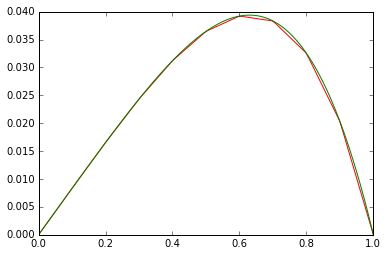

In [137]:
y = np.zeros(10*n)
y2 = np.zeros(10*n)
for i in range(10*n):
     y[i] = u(x[i])
     y2[i] = sol_func(x[i])   
       
plt.plot(x,y,"r")
plt.plot(x,y2,"g")
